In [1]:
import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data['L']=0
data.loc[data['LossRatio'] >.57 ,'L'] = 1
data.to_csv("/home/jash/Desktop/petplan/Profitability.csv")
Y=data['L']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)

m=x.loc[x['PolicyForm']!='Introductory']
q=pd.DataFrame(m)
m2=q.loc[q['PolicyForm']!='Intro']
x=pd.DataFrame(m2)

print x.head()

   LossRatio  Duration            PetId   StartDate     EndDate LastPolicyRef  \
0   2.394985       830   US1673042Louie  2016-04-19  2019-04-18        620205   
1   0.000000      1171   US275863PeeWee  2015-05-14  2019-05-13        635214   
2   0.000000       347  CAN288664Stella  2017-08-15  2018-08-14        109286   
3   0.673642      1297   US117714Fozzie  2015-01-08  2019-01-07        558292   
4   0.000000        61    CAN131026Nala  2015-06-26  2015-08-25         19599   

   TotalClaimsAmtPaid  TotalEarnedPremium                BreedName  \
0            3408.032         1422.986575  American Cocker Spaniel   
1                 NaN          715.954795    Yorkshire Terrier Mix   
2               0.000          282.125260       Domestic Shorthair   
3            1183.796         1757.306521              Selkirk Rex   
4                 NaN           63.553333      Domestic Mediumhair   

   Currentage ...    Surname  GivenName CustomerMailingAddr_Addr1  \
0         2.0 ...      

In [3]:
len(x)

277273

In [4]:
x.columns

Index([u'LossRatio', u'Duration', u'PetId', u'StartDate', u'EndDate',
       u'LastPolicyRef', u'TotalClaimsAmtPaid', u'TotalEarnedPremium',
       u'BreedName', u'Currentage', u'CopayPct', u'Deductible', u'PetType',
       u'PolicyForm', u'CarrierCd', u'ClaimNumber', u'ClaimAmount',
       u'ClaimDetails', u'ConditionGrp', u'Claimcodecategory', u'Severity',
       u'CustomerNumber', u'Country', u'PhoneNumber', u'Surname', u'GivenName',
       u'CustomerMailingAddr_Addr1', u'CustomerMailingAddr_City',
       u'CustomerMailingAddr_StateProvCd', u'CustomerMailingAddr_PostalCode',
       u'Quadrant', u'claimdurationInception', u'churn\r', u'L'],
      dtype='object')

In [5]:
x.isnull().sum()

LossRatio                               0
Duration                                0
PetId                                   0
StartDate                               0
EndDate                                 0
LastPolicyRef                           0
TotalClaimsAmtPaid                 115246
TotalEarnedPremium                      0
BreedName                              24
Currentage                              0
CopayPct                                0
Deductible                              0
PetType                                 0
PolicyForm                              0
CarrierCd                               0
ClaimNumber                        149283
ClaimAmount                        149283
ClaimDetails                       149283
ConditionGrp                       149283
Claimcodecategory                  149283
Severity                           149581
CustomerNumber                        336
Country                               336
PhoneNumber                       

In [6]:
x.drop(['LossRatio'],axis=1,inplace=True)
x.drop(['CustomerNumber','PhoneNumber','Surname','GivenName','CustomerMailingAddr_Addr1','CustomerMailingAddr_City','CustomerMailingAddr_StateProvCd',
       'CustomerMailingAddr_PostalCode','PetId','StartDate','EndDate','LastPolicyRef'],axis=1,inplace=True)

In [7]:
p=pd.DataFrame(x)

In [8]:
len(p['BreedName'].unique())

533

In [9]:
p.isnull().sum()

Duration                       0
TotalClaimsAmtPaid        115246
TotalEarnedPremium             0
BreedName                     24
Currentage                     0
CopayPct                       0
Deductible                     0
PetType                        0
PolicyForm                     0
CarrierCd                      0
ClaimNumber               149283
ClaimAmount               149283
ClaimDetails              149283
ConditionGrp              149283
Claimcodecategory         149283
Severity                  149581
Country                      336
Quadrant                       0
claimdurationInception    149283
churn\r                        0
L                              0
dtype: int64

In [10]:
p.drop(['ClaimNumber','ClaimAmount','Severity','ClaimDetails','ConditionGrp','Claimcodecategory','claimdurationInception'],axis=1,inplace=True)

In [11]:
p.isnull().sum()

Duration                   0
TotalClaimsAmtPaid    115246
TotalEarnedPremium         0
BreedName                 24
Currentage                 0
CopayPct                   0
Deductible                 0
PetType                    0
PolicyForm                 0
CarrierCd                  0
Country                  336
Quadrant                   0
churn\r                    0
L                          0
dtype: int64

In [12]:
p.drop(['TotalClaimsAmtPaid'],axis=1,inplace=True)

In [13]:
p.isnull().sum()

Duration                0
TotalEarnedPremium      0
BreedName              24
Currentage              0
CopayPct                0
Deductible              0
PetType                 0
PolicyForm              0
CarrierCd               0
Country               336
Quadrant                0
churn\r                 0
L                       0
dtype: int64

In [14]:
len(p)

277273

In [15]:
p.dropna(how='any',inplace=True)

In [16]:
p.drop(['churn\r'],axis=1,inplace=True)

In [17]:
p.isnull().sum()

Duration              0
TotalEarnedPremium    0
BreedName             0
Currentage            0
CopayPct              0
Deductible            0
PetType               0
PolicyForm            0
CarrierCd             0
Country               0
Quadrant              0
L                     0
dtype: int64

In [18]:
len(p['BreedName'].unique())

531

In [19]:
len(p['PetType'].unique())

4

In [20]:
len(p['PolicyForm'].unique())

10

In [21]:
len(p['PolicyForm'].unique())

10

In [22]:
p.drop(['BreedName'],axis=1,inplace=True)

In [23]:
p.isnull().sum()

Duration              0
TotalEarnedPremium    0
Currentage            0
CopayPct              0
Deductible            0
PetType               0
PolicyForm            0
CarrierCd             0
Country               0
Quadrant              0
L                     0
dtype: int64

In [24]:
p.columns

Index([u'Duration', u'TotalEarnedPremium', u'Currentage', u'CopayPct',
       u'Deductible', u'PetType', u'PolicyForm', u'CarrierCd', u'Country',
       u'Quadrant', u'L'],
      dtype='object')

In [25]:
cols_to_transform = ['PetType','PolicyForm','Country','Quadrant']
df = pd.get_dummies(p)

In [26]:
df.head()

,Duration,TotalEarnedPremium,Currentage,CopayPct,Deductible,L,PetType_Cat,PetType_Dog,PetType_PPCAT001,PetType_PPDOG001,...,CarrierCd_AGR,CarrierCd_ALZ,CarrierCd_CAN,CarrierCd_XLC,Country_CAN,Country_US,Quadrant_HighTenure-HighLR,Quadrant_HighTenure-LowLR,Quadrant_LowTenure-HighLR,Quadrant_LowTenure-LowLR
0,830,1422.986575,2.0,0.9,350,1,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,1171,715.954795,5.0,0.8,300,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,347,282.125260,0.0,0.9,300,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,1297,1757.306521,9.0,0.9,200,1,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,61,63.553333,5.0,1.0,200,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
y=df['L']
df.drop(['L'],axis=1,inplace=True)
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(5, 10)}
from sklearn.model_selection import GridSearchCV
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [28]:
dtree.get_params

<bound method DecisionTreeClassifier.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')>

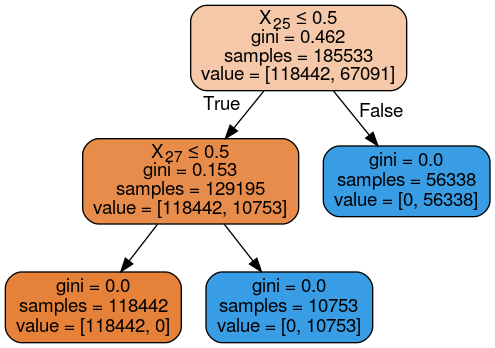

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
y_predict = dtree.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

1.0

In [32]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted High Loss', 'Predicted Low Loss'],
    index=['True High Loss', 'True Low Loss']
)

,Predicted High Loss,Predicted Low Loss
True High Loss,58220,0
True Low Loss,0,33162
